<a href="https://colab.research.google.com/github/dlee449/QTM-350/blob/main/QTM350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Amazon Translate


In [ ]:
pip install googletrans==4.0.0-rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 11.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=780113bb8addacf8faaef2f9da192e1d936328ee472e6009582362ab4085011c
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 5.0 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.2
    Uninstalling spacy-3.4.2:
      Successfully uninstalled spacy-3.4.2


In [ ]:
!python -m spacy download en_core_web_lg

2022-11-21 14:57:22.441398: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 15 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 56.7 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 140 kB 51.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_sm

2022-11-21 14:56:33.272854: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 2.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import boto3
import pandas as pd
from googletrans import Translator

In [ ]:
url = 'https://raw.githubusercontent.com/jtaylor515/QTM350finalprojectgroup4/main/Spanish%3AEnglish%20words.csv'
df = pd.read_csv(url)
df

,Type,Spanish,English,Unnamed: 3
0,word,Hola,Hello,NaN
1,word,Manzana,Apple,NaN
2,word,Bote,Boat,NaN
3,word,Yo,I,NaN
4,word,Tú,You,NaN
...,...,...,...,...
75,word,Tocayo,name twin,NaN
76,phrase,Hablar Sin Pelos En La Lengua,To speak frankly,NaN
77,phrase,Dar Calabazas,Stand someone up on a date,NaN
78,phrase,Por Si Las Moscas,Just in case,NaN


In [ ]:
del df['Unnamed: 3']

In [ ]:
import boto3

client = boto3.client('translate', region = 'us-east-1')

def aws_translate_text(text):
    response = client.translate_text(
        Text=text,
        SourceLanguageCode='es',
        TargetLanguageCode='en'
    )
    return response['TranslatedText']
aws_translate_text('Hola')


TypeError: ignored

In [ ]:
aws_result = []
for input in df['Spanish']:
    aws_result.append(aws_translate_text(input))

df['AWS: ES to EN'] = aws_result
df

In [ ]:
from googletrans import Translator
import pandas as pd
translator = Translator()

df['Google: ES to EN'] = df['Spanish'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))
df

## Measure context similarity

Spacy uses context similarity and word vectors. Expalining context similarity,

In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")


In [ ]:
doc1 = nlp(u'cat')
doc2 = nlp(u'kitten')
doc3 = nlp(u'dog')
doc4 = nlp(u'airplane')

print(doc1)
print(doc1.similarity(doc2))
print(doc1.similarity(doc3))
print(doc2.similarity(doc3))

In [ ]:
AWS_sim = []
Google_sim = []
for i in range(len(df['Type'])):
    AWS_trans = df['AWS: ES to EN'][i]
    Google_trans = df['Google: ES to EN'][i]
    correct_trans = df['English'][i]
    correct_doc = nlp(correct_trans)
    AWS_doc = nlp(AWS_trans)
    Google_doc = nlp(Google_trans)
    if AWS_doc.vector_norm:
        AWS_sim.append(correct_doc.similarity(AWS_doc))
    else:
        AWS_sim.append(0)
    if Google_doc.vector_norm:
        Google_sim.append(correct_doc.similarity(Google_doc))
    else:
        Google_sim.append(0)

In [ ]:
AWS_sim_word = []
Google_sim_word = []
for i in range(0,76):
    AWS_trans = df['AWS: ES to EN'][i]
    Google_trans = df['Google: ES to EN'][i]
    correct_trans = df['English'][i]
    correct_doc = nlp(correct_trans)
    AWS_doc = nlp(AWS_trans)
    Google_doc = nlp(Google_trans)
    if AWS_doc.vector_norm:
        AWS_sim_word.append(correct_doc.similarity(AWS_doc))
    else:
        AWS_sim_word.append(0)
    if Google_doc.vector_norm:
        Google_sim_word.append(correct_doc.similarity(Google_doc))
    else:
        Google_sim_word.append(0)

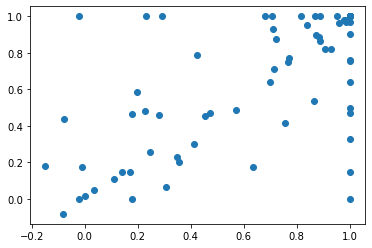

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(AWS_sim, Google_sim)

In [ ]:
import statsmodels.api as sm
x = AWS_sim
y = Google_sim
res = sm.OLS(y,x).fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              476.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    3.33e-35
Time:                        13:33:23   Log-Likelihood:                         -13.648
No. Observations:                  80   AIC:                                      29.30
Df Residuals:                      79   BIC:                                      31.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

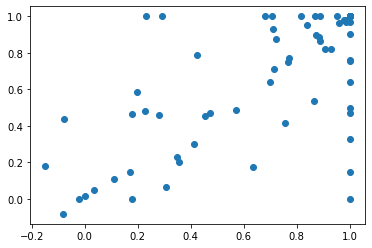

In [ ]:
plt.scatter(AWS_sim_word, Google_sim_word)

In [ ]:
x = AWS_sim_word
y = Google_sim_word
res = sm.OLS(y,x).fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              540.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    5.19e-36
Time:                        13:39:33   Log-Likelihood:                         -8.1356
No. Observations:                  76   AIC:                                      18.27
Df Residuals:                      75   BIC:                                      20.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 0.91 shows that AWS translate shows better performance than Google translate